In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR') #prevents unnecessary mpl warnings about sns color palette

In [4]:
df = pd.read_csv("data/netflix_titles_nov_2019.csv")
df.head(3)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie


In [3]:
df.shape

(5837, 12)

## Self tasks
- Countries v Amount (TV & Movies) - DONE
- Countries v Year
- Group Type & Average the duration:
- Most active Director
- Graphs of the above

## Deeper analysis
- How does this data correspond to all movies not just movies on netflix?>
- How quickly do movies appear on netflix after being released?
- Top actors on netflix?
  - Top actors on netflix per country?
- min vs max of duration (movies & tv show)

In [93]:
df_movies = df[ df["type"] == "Movie" ]

In [94]:
df_tv = df[ df["type"] == "TV Show" ]

#### Dataframe of highest **movie producing country**:

In [116]:
#NOTE: WITH MORE TIME REVISIT THIS
test2 =  df_movies[ df_movies["country"].str.contains(',') == False ] # This is really bad practice but due to time constraints I'm removing all rows with multiple countries
df_count_of_movies_by_country = test2.groupby("country", as_index=False)["country"].agg({"movie_count":"count"}).sort_values("movie_count", ascending=False)
df_count_of_movies_by_country.head(3)

,country,movie_count
52,United States,1375
22,India,645
51,United Kingdom,162


#### The 3 highest **movie** producing countries are:

In [152]:
top_3 = df_count_of_movies_by_country.head(3)
lst_top3 = list(top_3["country"])
lst_top3

['United States', 'India', 'United Kingdom']

#### Plot of countries that have produced the most **movies**

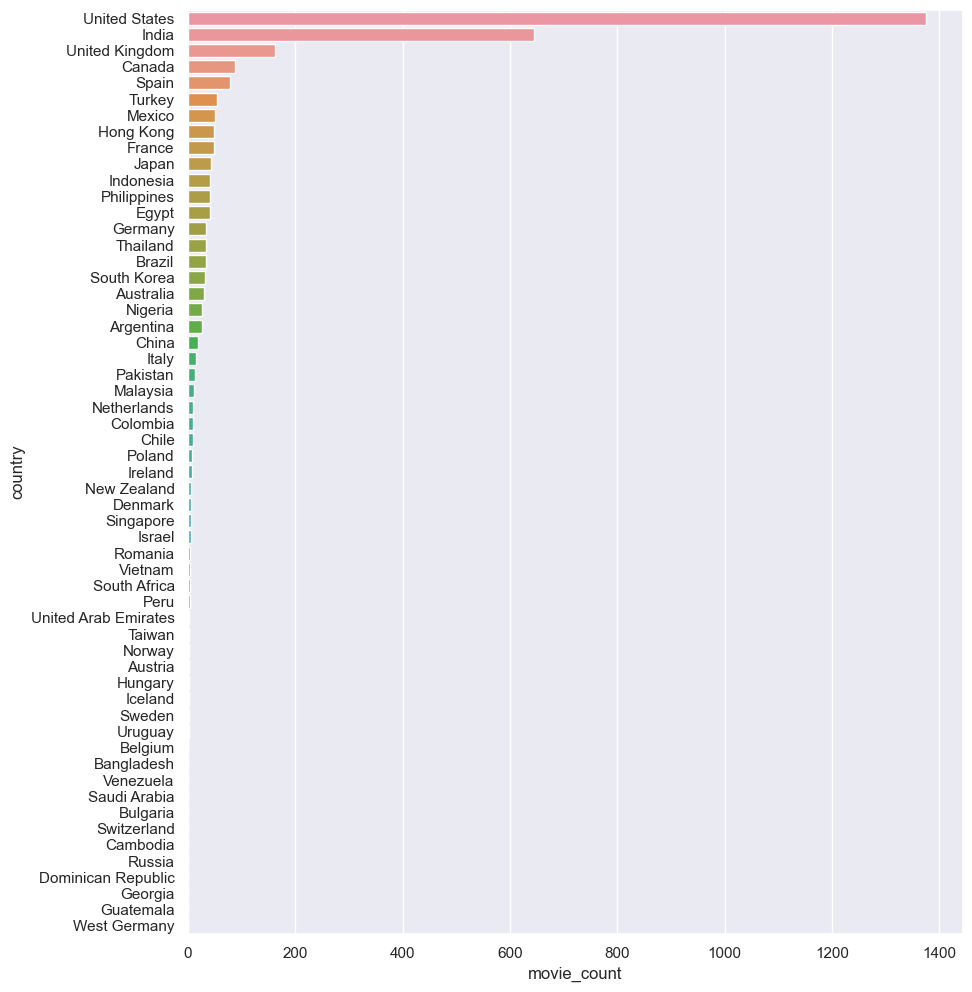

In [90]:
plt.figure(figsize=(10,12))

plt_movie = sns.barplot(
    df_count_of_movies_by_country,
    x="movie_count", y="country"
)

#### Dataframe of **years and countries**:
Can we infer growth rate of real world data?
Let's analyse the top 3 countries:

In [154]:
test5 = df_movies[ (df_movies["country"].str.contains(',') == False) & (df_movies["country"].isin(lst_top3) == True) ]
test5.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
16,81033086,Holiday Rush,Leslie Small,"Romany Malco, Sonequa Martin-Green, Darlene Lo...",United States,"November 28, 2019",2019,TV-PG,94 min,"Children & Family Movies, Dramas",A widowed radio DJ and his four spoiled kids n...,Movie
23,70101696,Defiance,Edward Zwick,"Daniel Craig, Liev Schreiber, Jamie Bell, Alex...",United States,"November 27, 2019",2008,R,137 min,"Action & Adventure, Dramas",In this action-packed drama based on an extrao...,Movie
24,81194544,Evvarikee Cheppoddu,Basava Shankar Eeday,"Rakesh Varre, Gargeyi, Vamsi raj Nekkanti, D P...",India,"November 27, 2019",2019,TV-14,134 min,"Comedies, International Movies, Romantic Movies",When caste differences throw a wrench into the...,Movie
27,80175798,The Irishman,Martin Scorsese,"Robert De Niro, Al Pacino, Joe Pesci, Harvey K...",United States,"November 27, 2019",2019,R,209 min,Dramas,Hit man Frank Sheeran looks back at the secret...,Movie


In [155]:
df_count_of_movies_by_country_by_year = test5.groupby(["country","release_year"], as_index=False)["title"].count().rename(columns={"title":"count"})
df_count_of_movies_by_country_by_year.head(3)

,country,release_year,count
0,India,1959,1
1,India,1962,1
2,India,1966,1


In [173]:
df_count_of_movies_by_country_by_year.sort_values("count", inplace=True, ascending=False)
movies_US = df_count_of_movies_by_country_by_year[ df_count_of_movies_by_country_by_year["country"] == "United States" ]
movies_INDIA = df_count_of_movies_by_country_by_year[ df_count_of_movies_by_country_by_year["country"] == "United Kingdom" ]
movies_UK = df_count_of_movies_by_country_by_year[ df_count_of_movies_by_country_by_year["country"] == "India" ]

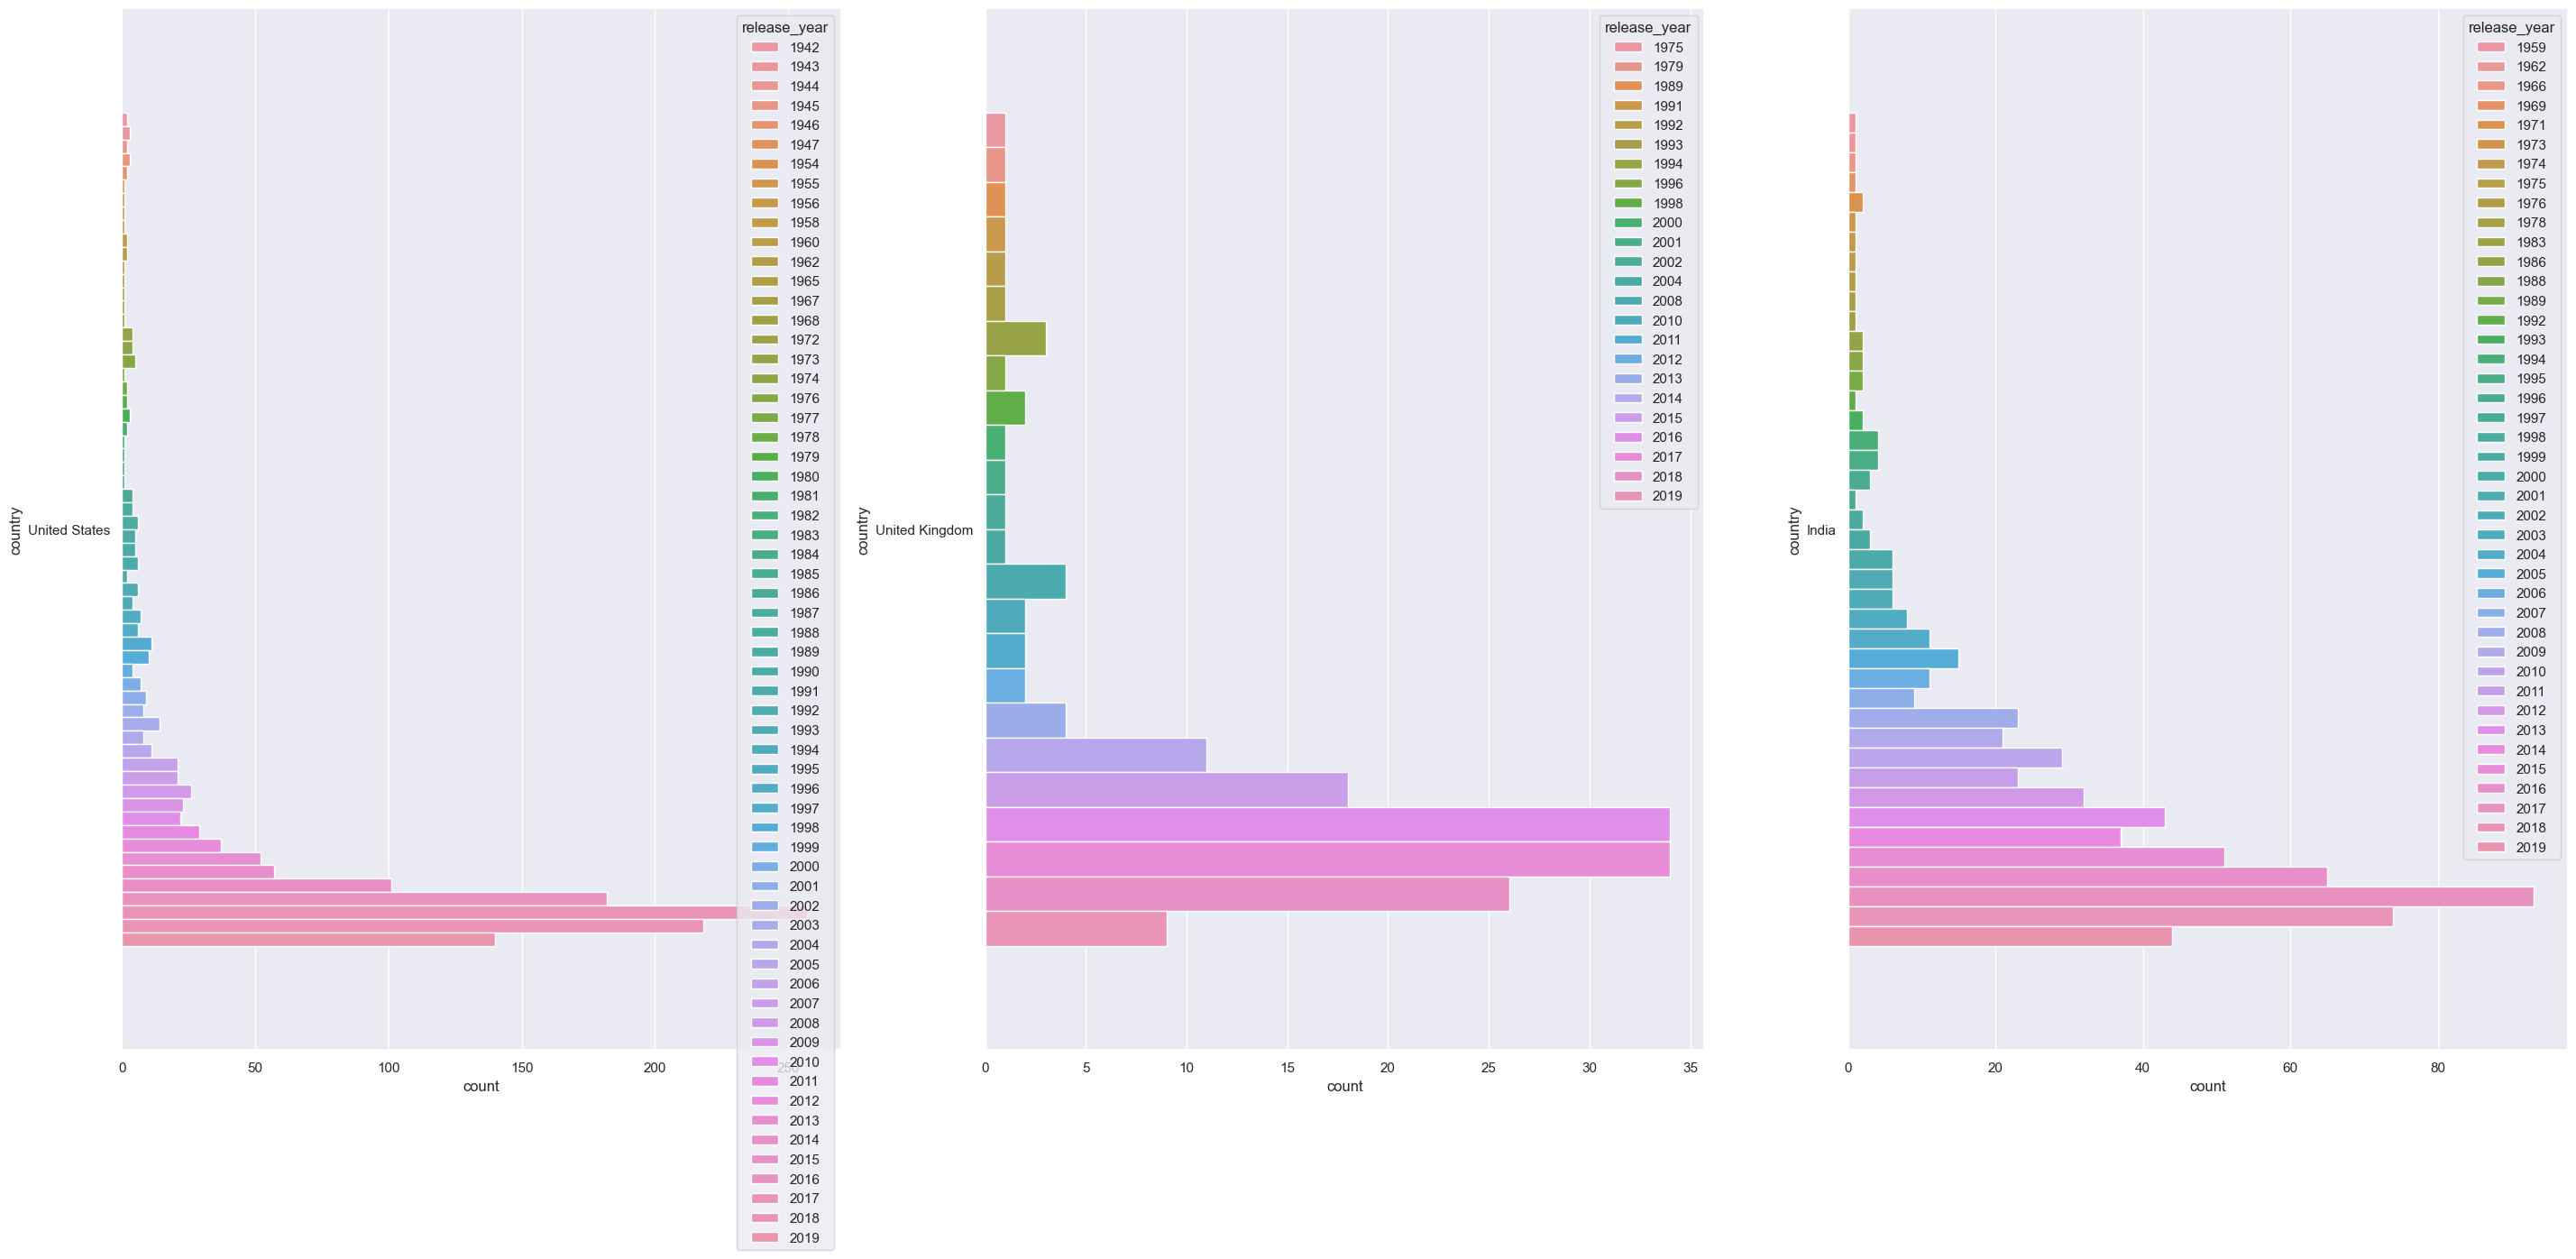

In [181]:
fig, axs = plt.subplots(
    ncols=3,
    figsize=(35,15)
    );

sns.barplot(
    movies_US,
    x="count",
    y="country",
    hue="release_year",
    orient='h',
    ax=axs[0]
);

sns.barplot(
    movies_INDIA,
    x="count",
    y="country",
    hue="release_year",
    orient='h',
    ax=axs[1]
);

sns.barplot(
    movies_UK,
    x="count",
    y="country",
    hue="release_year",
    orient='h',
    ax=axs[2]
);

#### If we had time:
We'd clean up the graph to make each country more comparible

In [180]:
# plt.figure(figsize=(10,12))

# plt_movie_US = sns.barplot(
#     movies_US,
#     x="count",
#     y="country",
#     hue="release_year",
#     orient='h',
# )


In [179]:
# plt.figure(figsize=(10,12))

# plt_movie_INDIA = sns.barplot(
#     movies_INDIA,
#     x="count",
#     y="country",
#     hue="release_year",
#     orient='h'
# )

In [178]:
# plt.figure(figsize=(10,12))

# plt_movie_UK = sns.barplot(
#     movies_UK,
#     x="count",
#     y="country",
#     hue="release_year",
#     orient='h'
# )